<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فروشگاه محصولات اداری
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین داده‌های مربوط به یک فروشگاه لوازم اداری به شما داده شده است.
نخست داده‌ها را از فایل 
<code>Global-Superstore.xlsx</code>
بخوانید و در متغیر <code>df</code> بریزید.
</font>
</p>

In [81]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('SuperStore.csv')


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالا با استفاده از کتابخانه plt نمودار سود (profit) رادر یک نمودار هیستوگرام رسم کنید.
تعداد ستون ها را حداقل 250 تا در نظر بگیرید.
هم چنین برای مشاهده بهتر نمودار، بازه سود را محدودتر کنید.
</font>
</p>

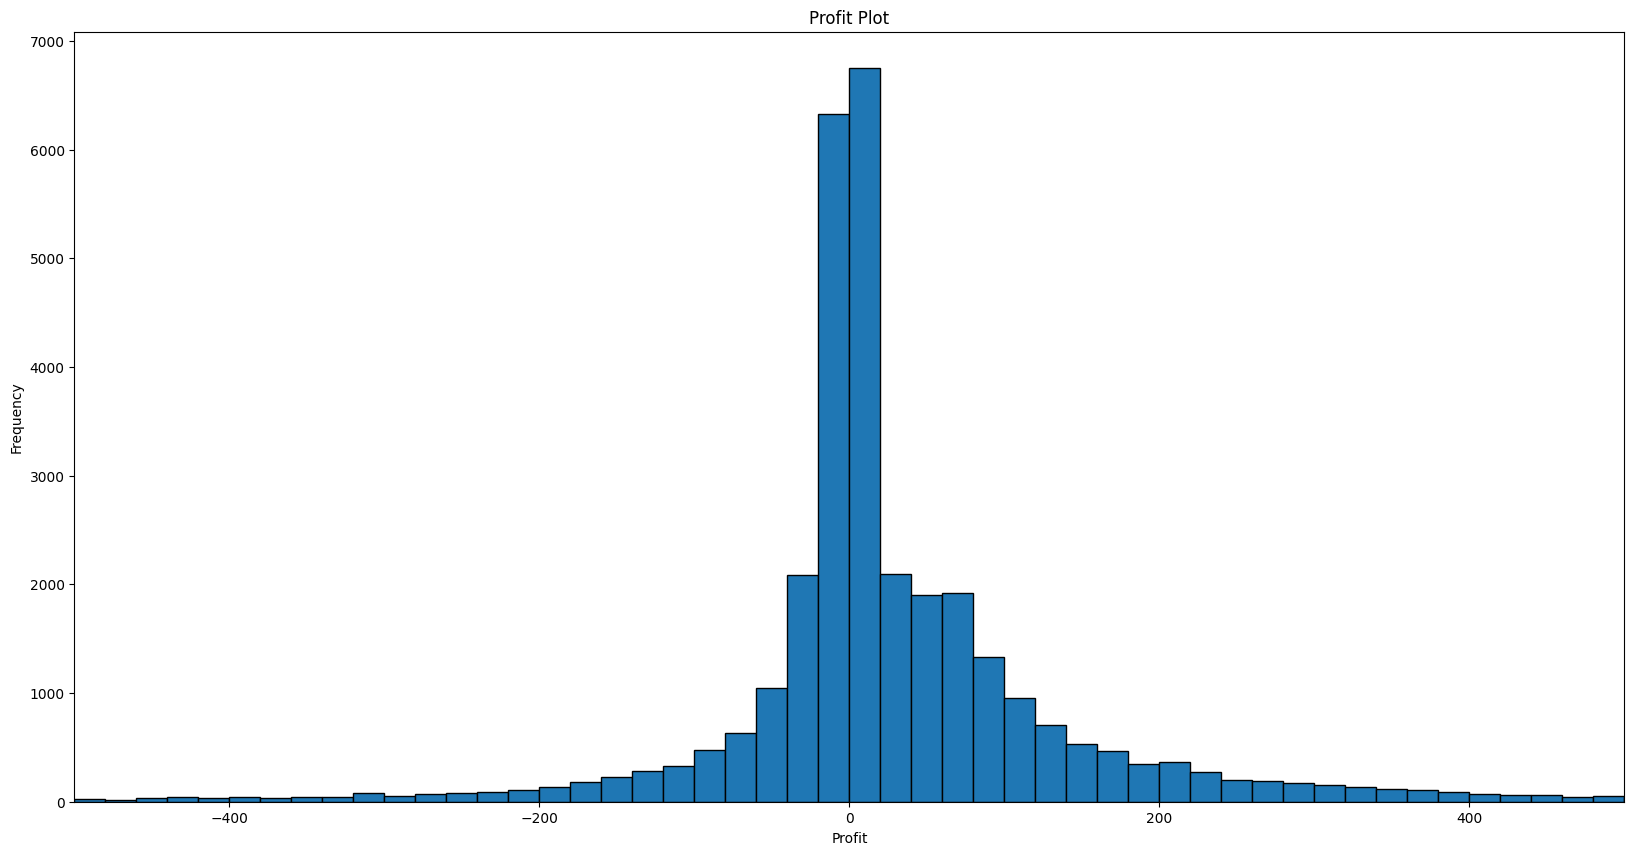

In [83]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(df['Profit'], bins = 750, edgecolor = "black", align = 'mid')
plt.xlim(-500,500)
ax.set_title('Profit Plot')
ax.set_xlabel('Profit')
ax.set_ylabel('Frequency')
plt.show()

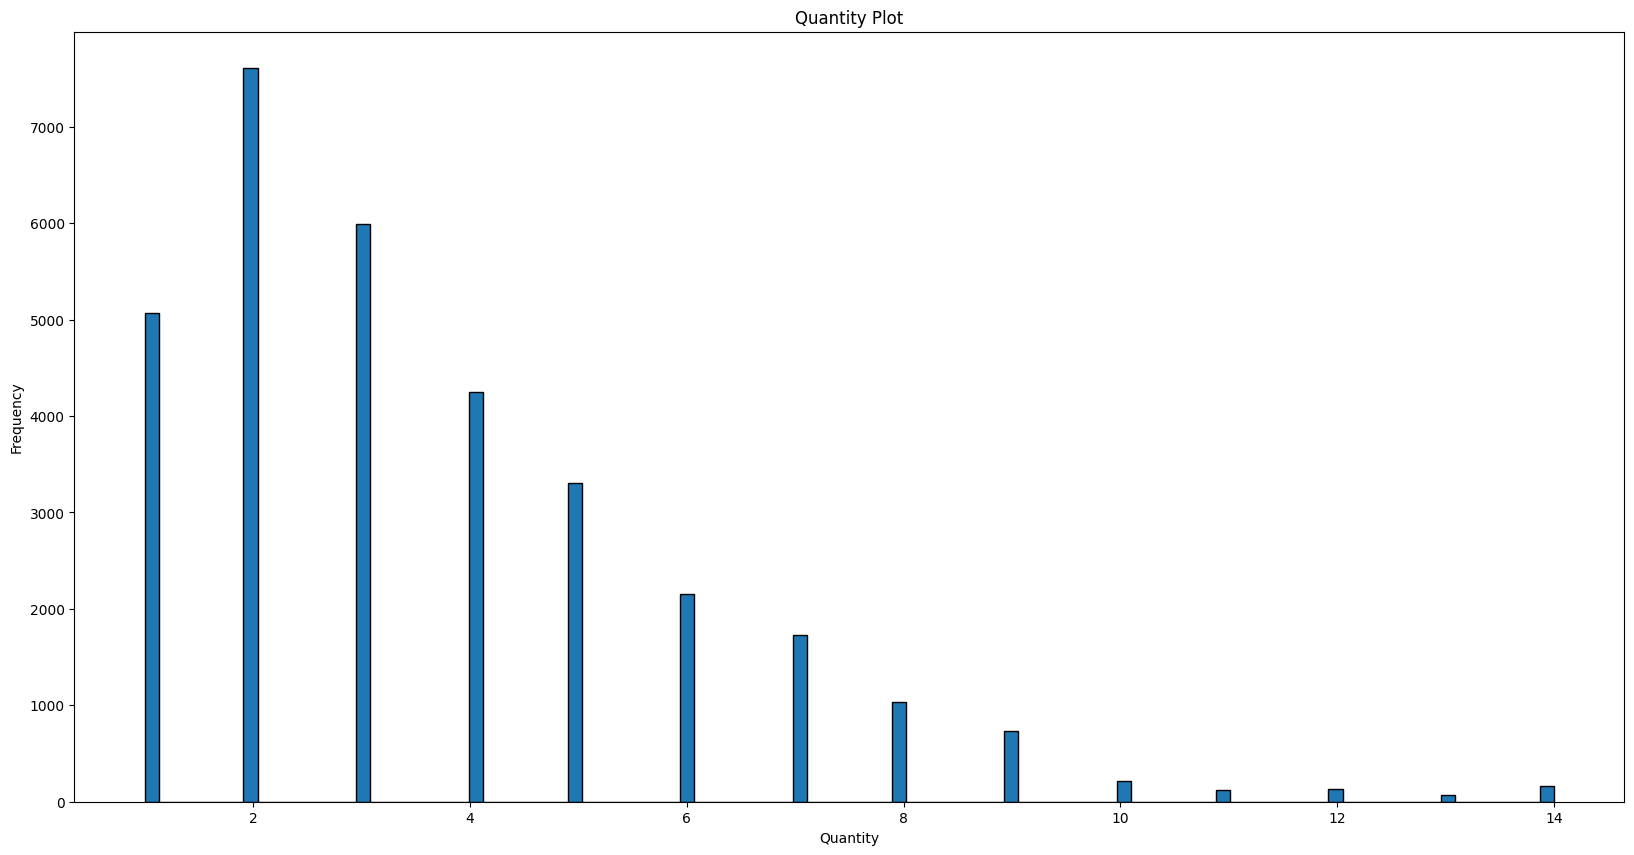

In [84]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(df['Quantity'],bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('Quantity Plot')
ax.set_xlabel('Quantity')
ax.set_ylabel('Frequency')
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>در این سوال میخواهیم شما ۲ فرضیه را مورد ارزیابی قرار دهید و نتایج خود را برای ما شرح دهید و در آن ها دقیق شوید.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> در انتخاب مدل برای تست فرض و همچنین داده‌های لازم برای انجام تست بسیار دقت کنید .</font>
</p>



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3> برای فرض اول لازم است که سطرهای دیتافریم را طبق ستون نوع ارسال از هم جدا کنید.. </font>
</p><p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3> برای فرض دوم هم لازم است که فروش‌های با تخفیف را از بدون تخفیف‌ها جدا کنید. </font>
</p>

In [85]:
dff = df[df['Ship Mode']=='First Class']

In [86]:
dfs = df[df['Ship Mode']=='Standard Class']

In [87]:
dfwd = df[df['Discount'] != 0]

In [88]:
dfnd = df[df['Discount'] == 0]

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرضیه اول</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
از شما میخواهیم که بررسی کنید که آیا روش ارسال‌های متفاوت (Ship Mode) روی میزان سودی که فروشگاه به دست می‌آورد تاثیرگذار است یا خیر؛
برای این کار دو حالت ‍‍First Class و Standard Class را با هم مقایسه کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این بخش لازم است که بدون استفاده از تست های پیش فرض کتابخانه ها به انجام تست مورد نظر بپردازید. برای مثال اگر قصد دارید از تی تست استفاده کنید لازم است که آماره ی آن را پیدا کرده و با محاسبه ی مفروضات آن مانند میانگین و واریانس آن را به صورت دستی تولید کنید. از کتابخانه ی scipy برای شبیه سازی توزیع ها و شناسایی بازه ها و همچنین پیدا کردن پی ولیو می توانید استفاده کنید.
</font>
</p>

Using dff, dfs for the profit column.

First situation called x using 'Standard Class', Second situation called y using 'First Class'

α = 0.05

Floodgate through equality

H0 : μx = μy

H1 : μx != μy

Data is normally distributed so we use a ttest

U = (xbar - ybar) / sqrt(stdx^2/nx + stdy^2/ny)

A = (-k[α/2], k[α/2])

If U in A, Null hypothesis

In [89]:
xbar = dfs['Profit'].mean()
ybar = dff['Profit'].mean()
xbar, ybar

(37.119373888065425, 34.95111632932393)

In [90]:
stdx = dfs['Profit'].std()
stdy = dff['Profit'].std()
stdx, stdy

(217.25838491808156, 224.09200857758333)

In [91]:
U = (xbar - ybar) / np.sqrt((stdx**2/len(dfs)) + (stdy**2/len(dff)))
U

0.6054147512542649

In [92]:
A = (-scipy.stats.norm.ppf(.975), scipy.stats.norm.ppf(.975))
A

(-1.959963984540054, 1.959963984540054)

In [93]:
U >= A[0] and U <= A[1]

True

Therefore, there are not enough evidence to reject the null hypothesis with significance level of 0.05 and it will be accepted that the shipment mode has no effect on our profit.

In [94]:
#*2 because of being two way!
p_value = scipy.stats.norm.sf(abs(U))*2
p_value

0.5449034520686368

We can use the respective p-value to discuss other significance levels.

With the p-value being too high, the null hypothesis will be accepted at any incident significance level (0.1, 0.05, 0.01).

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرضیه دوم</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>از شما میخواهیم تا بررسی کنید آیا تخفیف‌دار کردن محصولات باعث افزایش تعداد کالا های خریداری شده از تمام نوع ها (Quantity) در فروشگاه خواهد شد یا خیر.
</font>
</p>

Our data distribution is not normal; so we must conduct a test without t-test basis.

Using dfwd, dfnd for the quantity column.

First situation called x using 'No Discount', Second situation called y using 'With Discount'

α = 0.05

Floodgate through quantity equality

H0 : μx = μy

H1 : μx != μy

We will conduct a U test.

In [95]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(dfnd['Quantity'], dfwd['Quantity'])
p_value

2.340002031661757e-05

Therefore we can imply that our null hypothesis is rejected, meaning that there is a significant relation between Discount and Quantity!

It can be stated that our discounts has affected our sales.

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در قسمت بالا با اجرای یک تست پیش فرض در کتابخانه ی scipy میتوانیم به جواب سوال برسیم اما باید این را درک کنیم که استفاده از جایگزین های تست فرض مبتنی بر ttest میتواند بعضا نادقیق باشد. 
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای این که بتوانیم این نادقیقی را از بین ببریم هر جا بتوانیم جواب این نوع تست ها را با تی تست متناظر آن چک میکنیم. اما چون داده های این بخش غیرنرمال است، نمی توانیم مستقیما از این تست ها بر روی این داده ها استفاده کنیم. برای رفع این مشکل از دو تبدیل برای داده ها استفاده میکنیم. تبدیل اول boxcox transformation و تبدیل دوم yeo-johnson transformation نام دارد. لازم است با بررسی هر دوی این تبدیل ها بهترین را بیابید و با پیاده سازی آن بر روی داده ها نرمال شدن آن را چک کنید. اگر داده ها نرمال نبود مجددا از تست غیر تی تست برای بررسی ایده ی اصلی استفاده کرده و اگر نرمال شده بود از تی تست برای بررسی مجدد ایده ی سوال استفاده کنید.
</font>
</p>

Another way would be

Using BoxCox Transformation to make our data more normal-like!

In [96]:
from scipy import stats

dfx, lmbda = stats.boxcox(df['Quantity'])

dfx

array([2.12185691, 2.4232586 , 2.4232586 , ..., 0.        , 0.71465362,
       1.15329163])

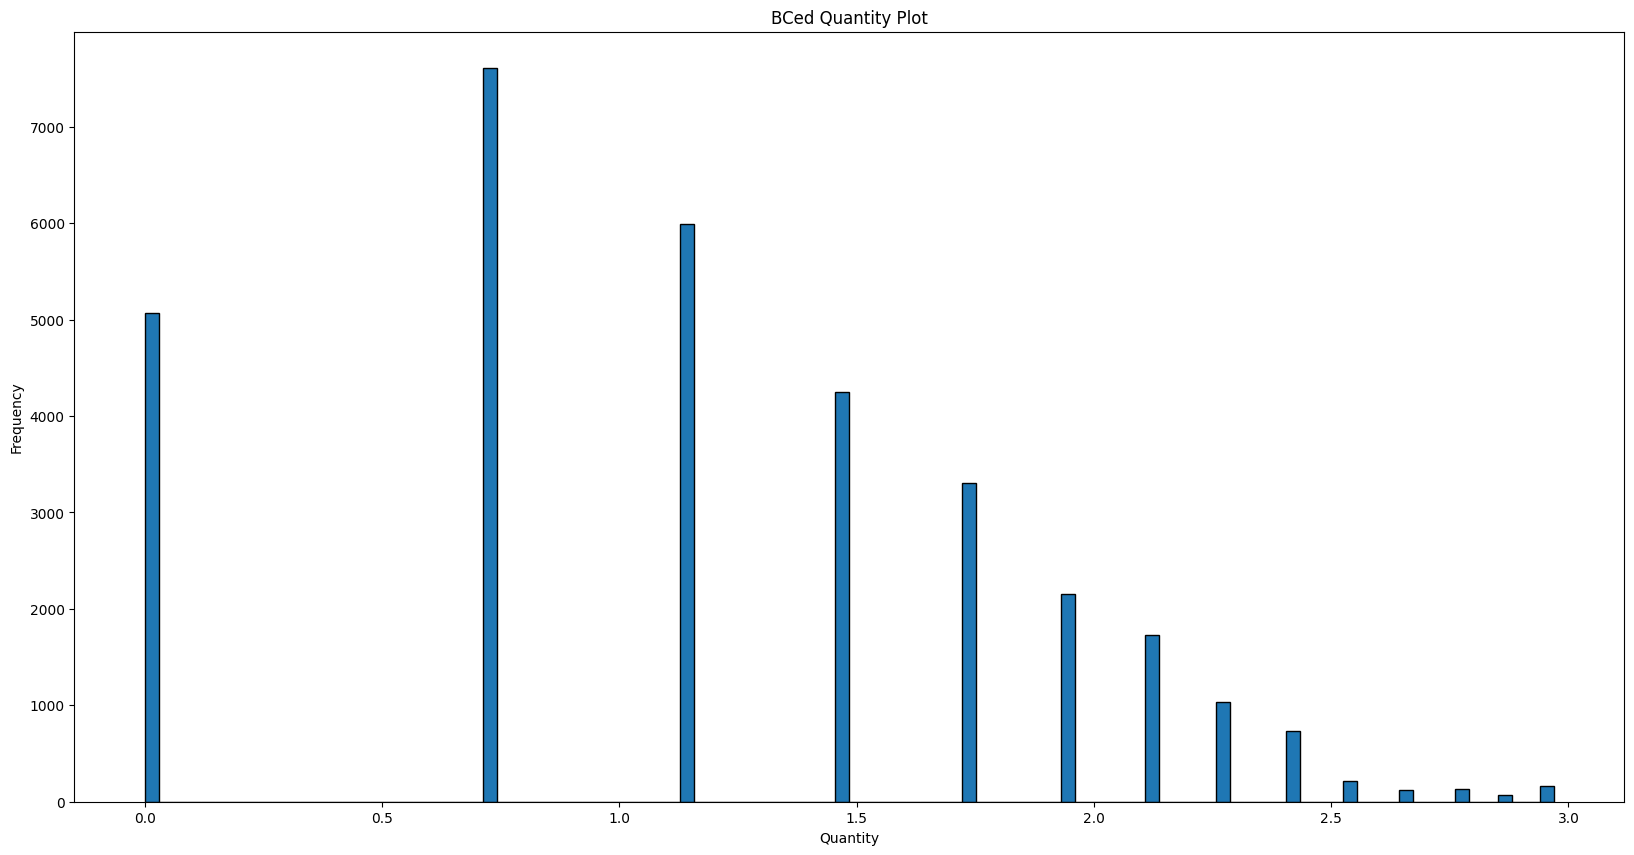

In [97]:
fig , ax = plt.subplots(figsize=(20,10))
plt.hist(dfx,bins = 100, edgecolor = "black", align = 'mid')
ax.set_title('BCed Quantity Plot')
ax.set_xlabel('Quantity')
ax.set_ylabel('Frequency')
plt.show()

If our data was normal, we could act like below:

Without considering category differences

In [98]:
data = pd.concat([df,pd.DataFrame(dfx)], axis =1)
data = data.rename(columns={0:'BC'})
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,BC
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2.121857
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2.423259
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2.423259
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,1.728589
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2.281174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,46582,TU-2014-6730,2014-11-29,2014-11-30,First Class,KF-6285,Karen Ferguson,Home Office,Midyat,Mardin,...,Office Supplies,Art,"Boston Pens, Blue",34.128,6,0.6,-49.5720,0.02,Medium,1.940245
32555,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,1.728589
32556,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,0.000000
32557,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,S‹o Paulo,...,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,0.714654


In [99]:
dfwd = data[data['Discount'] != 0]

In [100]:
dfnd = data[data['Discount'] == 0]

Using dfwd, dfnd for the quantity column.

First situation called x using 'No Discount', Second situation called y using 'With Discount'

α = 0.05

Floodgate through quantity equality

H0 : μx = μy

H1 : μx != μy

U = (xbar - ybar) / sqrt(stdx^2/nx + stdy^2/ny)

A = (-inf, k[α])

If U in A, Null hypothesis

In [101]:
xbar = dfnd['BC'].mean()
ybar = dfwd['BC'].mean()
xbar, ybar

(1.190520427379873, 1.159515743657522)

In [102]:
stdx = dfnd['BC'].std()
stdy = dfwd['BC'].std()
stdx, stdy

(0.7407030820054865, 0.7052311908691339)

In [103]:
U = (xbar - ybar) / np.sqrt((stdx**2/len(dfnd)) + (stdy**2/len(dfwd)))
U

3.8443906855343433

In [104]:
A = (scipy.stats.norm.ppf(.975), scipy.stats.norm.ppf(.975))
A

(1.959963984540054, 1.959963984540054)

In [105]:
U >= A[0] and U <= A[1]

False

Therefore, there are not enough evidence to accept the null hypothesis with the significance level of 0.05 and it will be accepted that the discount status has an effect on our quantity sold.

In [106]:
p_value = scipy.stats.norm.sf(abs(U))
p_value

6.042617052181184e-05

We can use the respective p-value to discuss other significance levels.

With the p-value being too low, the null hypothesis won't be accepted at any incident significance level (0.1, 0.05, 0.01).

This result implies a correlation between discount and BC(BoxCoxed Quantity) too!

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این بخش هم لازم است به جای بررسی تاثیر تخفیف بر روی کل مجموعه ها، هر کدام از دسته ها را برای تخفیف داشتن یا نداشتن جدا کرده و روی هر کدام تست فرض مورد نیاز را پیاده کنیم.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
ابتدا با تست آنووا باید بررسی کنید که آیا این کار مفید است یا نه. سپس اگر این کار لازم بود، سه تست فرض بر روی هر سه گروه اقلام انجام دهید.
</font>
</p>

Anova test can be used between different categories:

In [107]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [108]:
data['Discount']=data['Discount'].where(data['Discount']==0,'D')
data['Discount']=data['Discount'].where(data['Discount']!=0,'N')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,BC
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,N,762.1845,933.57,Critical,2.121857
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,D,-288.7650,923.63,Critical,2.423259
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,D,919.9710,915.49,Medium,2.423259
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,D,-96.5400,910.16,Medium,1.728589
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,N,311.5200,903.04,Critical,2.281174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,46582,TU-2014-6730,2014-11-29,2014-11-30,First Class,KF-6285,Karen Ferguson,Home Office,Midyat,Mardin,...,Office Supplies,Art,"Boston Pens, Blue",34.128,6,D,-49.5720,0.02,Medium,1.940245
32555,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,N,4.5000,0.01,Medium,1.728589
32556,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,D,-1.1100,0.01,Medium,0.000000
32557,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,S‹o Paulo,...,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,N,2.4000,0.00,Medium,0.714654


In [109]:
model = ols('BC ~ Category * Discount',data=data).fit()
result = sm.stats.anova_lm(model, typ=2)
result

,sum_sq,df,F,PR(>F)
Category,25.453824,2.0,24.483181,2.371803e-11
Discount,9.410944,1.0,18.104144,2.097299e-05
Category:Discount,5.904615,2.0,5.679452,3.418816e-03
Residual,16921.786621,32553.0,NaN,NaN


With any of incident significance levels we can't say that Category-Discount intersection has no effect on quantity sold. Neither of Category nor Discount has no effect.

Therefore we can say that Category and Discount sepreately will effect our quantity and handing discounts will cause the data in each Category to differ.

We will conduct a hypothesis test for each category in advance to see where does discounts effect the category quantity.

In [110]:
df['Category'].value_counts()

Category
Office Supplies    17485
Technology          7661
Furniture           7413
Name: count, dtype: int64

In [111]:
dfndo = dfnd[dfnd['Category']=='Office Supplies']
dfndt = dfnd[dfnd['Category']=='Technology']
dfndf = dfnd[dfnd['Category']=='Furniture']

In [112]:
dfwdo = dfwd[dfwd['Category']=='Office Supplies']
dfwdt = dfwd[dfwd['Category']=='Technology']
dfwdf = dfwd[dfwd['Category']=='Furniture']

For all of below tests:

Floodgate through quantity increase

H0 : μx < μy

H1 : μx >= μy

U = (xbar - ybar) / sqrt(stdx^2/nx + stdy^2/ny)

A = (-inf, k[α])

If U in A, Null hypothesis

Hypo test for Office Supplies

In [113]:
xbar = dfndo['BC'].mean()
ybar = dfwdo['BC'].mean()
xbar, ybar

(1.1797558886787405, 1.1229107010497161)

In [114]:
stdx = dfndo['BC'].std()
stdy = dfwdo['BC'].std()
stdx, stdy

(0.7529863616311103, 0.7195929099842003)

In [115]:
U = (xbar - ybar) / np.sqrt((stdx**2/len(dfndo)) + (stdy**2/len(dfwdo)))
U

5.0903601421628935

In [116]:
A = (-np.inf, scipy.stats.norm.ppf(.95))
A

(-inf, 1.6448536269514722)

In [117]:
U >= A[0] and U <= A[1]

False

Therefore, there are not enough evidence to accept the null hypothesis with the significance level of 0.05 and it will be accepted that the discount status has no effect on our quantity sold.

In [118]:
p_value = scipy.stats.norm.sf(abs(U))
p_value

1.7869204313275637e-07

We can use the respective p-value to discuss other significance levels.

With the p-value being too low, the null hypothesis won't be accepted at any incident significance level (0.1, 0.05, 0.01).

Hypo test for Technology

In [119]:
xbar = dfndt['BC'].mean()
ybar = dfwdt['BC'].mean()
xbar, ybar

(1.2009927298681005, 1.177527347700778)

In [120]:
stdx = dfndt['BC'].std()
stdy = dfwdt['BC'].std()
stdx, stdy

(0.7247767915055259, 0.6920468876484474)

In [121]:
U = (xbar - ybar) / np.sqrt((stdx**2/len(dfndt)) + (stdy**2/len(dfwdt)))
U

1.4457821573610332

In [122]:
A = (-np.inf, scipy.stats.norm.ppf(.95))
A

(-inf, 1.6448536269514722)

In [123]:
U >= A[0] and U <= A[1]

True

Therefore, there are not enough evidence to reject the null hypothesis with the significance level of 0.05 and it will be accepted that the discount status has an increasing effect on our quantity sold.

In [124]:
p_value = scipy.stats.norm.sf(abs(U))
p_value

0.07411915607848696

We can use the respective p-value to discuss other significance levels.

With the p-value being at risk level, the null hypothesis won't be accepted at 0.1 but will be accepted for 0.05, 0.01.

Hypo test for Furniture

In [125]:
xbar = dfndf['BC'].mean()
ybar = dfwdf['BC'].mean()
xbar, ybar

(1.2081209813605764, 1.2181053847130308)

In [126]:
stdx = dfndf['BC'].std()
stdy = dfwdf['BC'].std()
stdx, stdy

(0.7246458497900629, 0.6825015870146949)

In [127]:
U = (xbar - ybar) / np.sqrt((stdx**2/len(dfndf)) + (stdy**2/len(dfwdf)))
U

-0.592370863132927

In [128]:
A = (-np.inf, scipy.stats.norm.ppf(.95))
A

(-inf, 1.6448536269514722)

In [129]:
U >= A[0] and U <= A[1]

True

Therefore, there are not enough evidence to reject the null hypothesis with the significance level of 0.05 and it will be accepted that the discount status has effect on our quantity sold in this category.

In [130]:
p_value = scipy.stats.norm.sf(abs(U))
p_value

0.2768011364698665

We can use the respective p-value to discuss other significance levels.

With the p-value being too high, the null hypothesis will be accepted at any incident significance level (0.1, 0.05, 0.01).

Finlly we can say, discounts in technology and furniture categories may incresae our sales depending significance levels, unlike office supplies.

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [131]:
import zlib
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["Statistics.ipynb", "SuperStore.csv"]

compress(file_names)

File Paths:
['Statistics.ipynb', 'SuperStore.csv']
